Load Relevant Libraries

In [3]:
import pandas as pd
import seaborn as sns
import json
import random
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

Load Data

In [4]:
class Category:
    BOOKS = "BOOKS"
    CLOTHING = "CLOTHING"
    ELECTRONICS = "ELECTRONICS"
    GROCERY = "GROCERY"
    PATIO = "PATIO"
class Review:
    def __init__(self,text,category):
        self.text = text
        self.category = category
class ReviewContainer:
    def __init__(self,reviews):
        self.reviews = reviews
    def get_text(self):
        return [x.text for x in self.reviews]
    def get_category(self):
        return [x.category for x in self.reviews]

In [5]:
files = ["./data/Books_small.json","./data/Clothing_small.json","./data/Electronics_small.json","./data/Grocery_small.json","./data/Patio_small.json"]
categorys = [Category.BOOKS,Category.CLOTHING,Category.ELECTRONICS,Category.GROCERY,Category.PATIO]
reviews = []
for i in range(len(files)):
    file = files[i]
    category = categorys[i]
    with open(file) as f:
        for line in f:
            review = json.loads(line)
            reviews.append(Review(review['reviewText'],category))
random.shuffle(reviews)

Prepare data

In [6]:
train, test = train_test_split(reviews,test_size=0.30,random_state=3)

training_data = ReviewContainer(train)
train_x = training_data.get_text()
train_y = training_data.get_category()

test_data = ReviewContainer(test)
test_x = test_data.get_text()
test_y = test_data.get_category()

vectorizer = TfidfVectorizer()

train_x_vectors = vectorizer.fit_transform(train_x)
test_x_vectors = vectorizer.transform(test_x)

Build models

SVM

In [7]:
clf_svm = SVC()
clf_svm.fit(train_x_vectors,train_y)

SVC()

Naive Bayes 

In [8]:
clf_nb = MultinomialNB()
clf_nb.fit(train_x_vectors,train_y)

MultinomialNB()

K-Nearest Neighbours

In [9]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(train_x_vectors,train_y)

KNeighborsClassifier()

Produce predictions

In [10]:
pred_svm = clf_svm.predict(test_x_vectors)
pred_nb = clf_nb.predict(test_x_vectors)
pred_knn = clf_knn.predict(test_x_vectors)

Accuracy checks

In [11]:
svm_acc = accuracy_score(test_y,pred_svm)
nb_acc = accuracy_score(test_y,pred_nb)
knn_acc = accuracy_score(test_y,pred_knn)
print(f'SVM accuracy: {round(svm_acc,3)}\nNB accuracy: {round(nb_acc,3)}\nKNN accuracy: {round(knn_acc,3)}')

SVM accuracy: 0.925
NB accuracy: 0.924
KNN accuracy: 0.871


Precision checks

In [12]:
svm_pre = precision_score(test_y,pred_svm,average='micro')
nb_pre = precision_score(test_y,pred_nb,average='micro')
knn_pre = precision_score(test_y,pred_knn,average='micro')
print(f'SVM precision: {round(svm_pre,3)}\nNB precision: {round(nb_pre,3)}\nKNN precision: {round(knn_pre,3)}')

SVM precision: 0.925
NB precision: 0.924
KNN precision: 0.871


F1-score checks

In [13]:
svm_f1 = f1_score(test_y,pred_svm,average='micro')
nb_f1 = f1_score(test_y,pred_nb,average='micro')
knn_f1 = f1_score(test_y,pred_knn,average='micro')
print(f'SVM F1-Score: {round(svm_f1,3)}\nNB F1-Score: {round(nb_f1,3)}\nKNN F1-Score: {round(knn_f1,3)}')

SVM F1-Score: 0.925
NB F1-Score: 0.924
KNN F1-Score: 0.871


Tuning model (GridSearchCV)

Tuned SVM

In [17]:
param_svm = {'C':(1,2,4,8),'kernel':('linear','poly','rbf'),'degree':(1,2,4,8),'gamma':('auto','scale')}
svm = SVC()
tuned_svm = RandomizedSearchCV(svm,param_svm,cv=3)
tuned_svm.fit(train_x_vectors,train_y)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': (1, 2, 4, 8),
                                        'degree': (1, 2, 4, 8),
                                        'gamma': ('auto', 'scale'),
                                        'kernel': ('linear', 'poly', 'rbf')})

Tuned NB

In [14]:
param_nb = {'alpha':(1,2,4,8),'force_alpha':(False,True),'fit_prior':(False,True)}
nb = MultinomialNB()
tuned_nb = RandomizedSearchCV(nb,param_nb,cv=5)
tuned_nb.fit(train_x_vectors,train_y)

RandomizedSearchCV(cv=5, estimator=MultinomialNB(),
                   param_distributions={'alpha': (1, 2, 4, 8),
                                        'fit_prior': (False, True),
                                        'force_alpha': (False, True)})

Tuned KNN

In [15]:
param_knn = {'n_neighbors':(1,2,4,8),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree'),'leaf_size':(10,20,30,40),'p':(1,2,4,8,16)}
knn = KNeighborsClassifier()
tuned_knn = RandomizedSearchCV(knn,param_knn,cv=3)
tuned_knn.fit(train_x_vectors,train_y)

C:\Users\tousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\tousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\tousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\tousi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ('auto', 'ball_tree',
                                                      'kd_tree'),
                                        'leaf_size': (10, 20, 30, 40),
                                        'n_neighbors': (1, 2, 4, 8),
                                        'p': (1, 2, 4, 8, 16),
                                        'weights': ('uniform', 'distance')})

Produce predictions (tuned models)

In [19]:
pred_svm_tuned = tuned_svm.predict(test_x_vectors)
pred_nb_tuned = tuned_nb.predict(test_x_vectors)
pred_knn_tuned = tuned_knn.predict(test_x_vectors)

Check accuracy (tuned models)

In [22]:
tuned_svm_acc = accuracy_score(test_y,pred_svm_tuned)
tuned_nb_acc = accuracy_score(test_y,pred_nb_tuned)
tuned_knn_acc = accuracy_score(test_y,pred_knn_tuned)
print(f'SVM: {round(tuned_svm_acc,3)}\nNB: {round(tuned_nb_acc,3)}\nKNN: {round(tuned_knn_acc,3)}')

SVM: 0.922
NB: 0.924
KNN: 0.862


In [ ]:
# Conclusion: Initial SVM model will be the final model as it has the highest precision score. Furthermore after hyperparamter tuning there is no significant difference in precision scores

Confusion matrix

<Axes: >

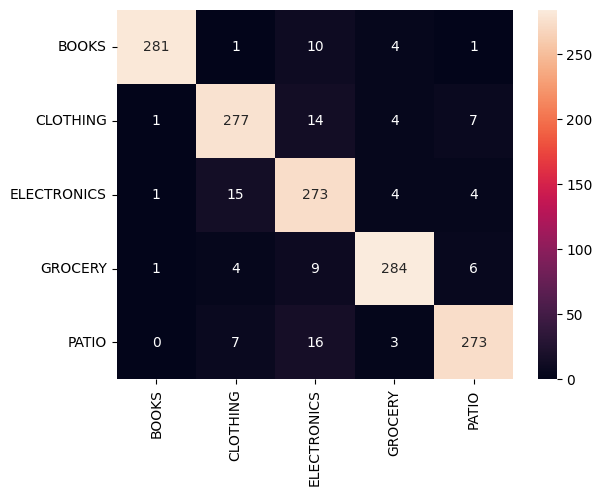

In [25]:
labels = [Category.BOOKS,Category.CLOTHING,Category.ELECTRONICS,Category.GROCERY,Category.PATIO]
cm = confusion_matrix(test_y,pred_svm,labels=labels)
cm_df = pd.DataFrame(cm,index=labels,columns=labels)
sns.heatmap(cm_df,annot=True,fmt='d')